In [23]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
from scipy.stats import ttest_ind, pearsonr, mannwhitneyu, shapiro
import statistics as stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import seaborn as sns

In [24]:
df = pd.read_csv('/Users/Nick/Downloads/diabetes (1).csv', index_col = 0)

In [25]:
print("number of rows is", df.shape[0])
print("number of columns is", df.shape[1])
print(df.columns)

number of rows is 442
number of columns is 11
Index(['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu',
       'prog'],
      dtype='object')


In [26]:
print("number of columns is", df.shape[1])
print(df.columns)

print("data types of columns are \n", df.dtypes)

print("first few rows are\n", df.head())
print()
print("no columns contain any null values; thus there are no missing values.\n", df.isna().any())

print("the target is", df.columns[-1], "Its data type is", df.dtypes['prog'])

number of columns is 11
Index(['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu',
       'prog'],
      dtype='object')
data types of columns are 
 age       int64
sex       int64
bmi     float64
map     float64
tc        int64
ldl     float64
hdl     float64
tch     float64
ltg     float64
glu       int64
prog      int64
dtype: object
first few rows are
    age  sex   bmi    map   tc    ldl   hdl  tch       ltg  glu  prog
1   59    1  32.1  101.0  157   93.2  38.0  4.0  2.110590   87   151
2   48    0  21.6   87.0  183  103.2  70.0  3.0  1.690196   69    75
3   72    1  30.5   93.0  156   93.6  41.0  4.0  2.029384   85   141
4   24    0  25.3   84.0  198  131.4  40.0  5.0  2.123852   89   206
5   50    0  23.0  101.0  192  125.4  52.0  4.0  1.863323   80   135

no columns contain any null values; thus there are no missing values.
 age     False
sex     False
bmi     False
map     False
tc      False
ldl     False
hdl     False
tch     False
ltg     False
glu     Fals

In [27]:
for column in df.columns[:-1]:
  print(column, df[column].mean(), df[column].std(), df[column].max()-df[column].min())

print("For target: prog", df['prog'].mean(),df['prog'].std(), df['prog'].max()-df['prog'].min())

print("Interquartile range of features are:")
for column in df.columns[:-1]:
  print(column, df[column].quantile(0.75)-df[column].quantile(0.25))
  print("the median is", df[column].median())

print("Interquartile range of target is ", df['prog'].quantile(0.75)-df['prog'].quantile(0.25))


age 48.51809954751131 13.109027822041092 60
sex 0.4683257918552036 0.4995611704353544 1
bmi 26.37579185520362 4.4181215606157735 24.200000000000003
map 94.64705882368777 13.831204205746994 71.0
tc 189.14027149321268 34.60805167504306 204
ldl 115.43914027149322 30.413080969276546 200.8
hdl 49.78846153846154 12.934202154863327 77.0
tch 4.070248868778281 1.2904498966082774 7.09
ltg 2.015739898174212 0.22687172168500705 1.2372729930325002
glu 91.26018099547511 11.496334739334172 66
For target: prog 152.13348416289594 77.09300453299109 321
Interquartile range of features are:
age 20.75
the median is 50.0
sex 1.0
the median is 0.0
bmi 6.074999999999999
the median is 25.7
map 21.0
the median is 93.0
tc 45.5
the median is 186.0
ldl 38.45
the median is 113.0
hdl 17.5
the median is 48.0
tch 2.0
the median is 4.0
ltg 0.3129292189636901
the median is 2.00646077277228
glu 14.75
the median is 91.0
Interquartile range of target is  124.5


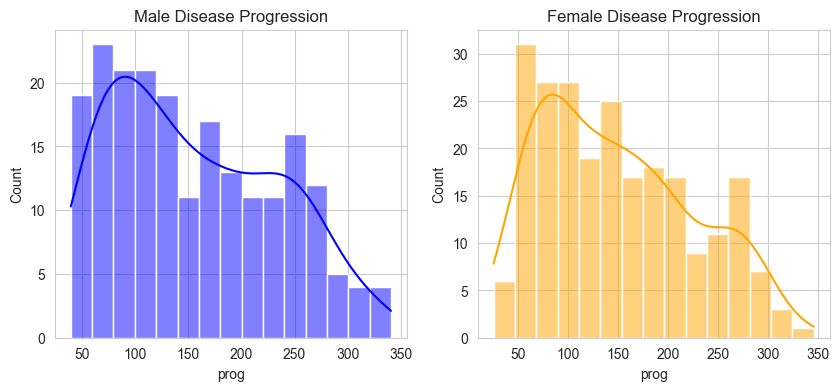

males: test statistic = 0.9472160505753628 p = 6.98349695157588e-07
females: test statistic = 0.9482366908843697 p = 2.0071299814161843e-07
U test statistic =  25375.0 p = 0.432427773770497


In [28]:
males = df[df['sex'] == 1]['prog'] #male
females = df[df['sex'] == 0]['prog'] #female

'''plt.hist(males, bins = 15, label = 'Male', alpha = 0.5, color = 'blue') #maybe for this plot should use total number of data pts to determine bins???
plt.hist(females, bins = 15, label = 'Female', alpha = 0.5, color = 'orange')
plt.title('Disease Progression')
plt.legend()
plt.show()
'''

fig, ax = plt.subplots(1,2,figsize = (10,4))

sns.histplot(males, bins = 15, kde = True, color = 'blue', ax = ax[0])
sns.histplot(females, bins = 15, kde = True, color = 'orange', ax = ax[1])
#k around = sqrt(males.size) #but probably want number of bins of both to be the same for easiest comparisons.
 #k around = sqrt(females.size)

ax[0].set_title('Male Disease Progression')
ax[1].set_title('Female Disease Progression')
plt.show()


#Histograms and KDE do not look normally distributed. Check this with Shapiro-Wilk Test,
stat1, p1 = shapiro(males)
stat2, p2 = shapiro(females)
print("males: test statistic =", stat1, "p =", p1)
print("females: test statistic =", stat2, "p =", p2)
#t-test not suitable since both samples are not normally distributed. Instead use mann-whitney U test.

stat, p_value = mannwhitneyu(males, females, alternative = 'two-sided')
print("U test statistic = ", stat, "p =", p_value)
#hence can't reject null hypothesis that the distributions of both samples are the same.

          age       sex       bmi       map        tc       ldl       hdl  \
age  1.000000  0.173737  0.185085  0.335427  0.260061  0.219243 -0.075181   
sex  0.173737  1.000000  0.088161  0.241013  0.035277  0.142637 -0.379090   
bmi  0.185085  0.088161  1.000000  0.395415  0.249777  0.261170 -0.366811   
map  0.335427  0.241013  0.395415  1.000000  0.242470  0.185558 -0.178761   
tc   0.260061  0.035277  0.249777  0.242470  1.000000  0.896663  0.051519   
ldl  0.219243  0.142637  0.261170  0.185558  0.896663  1.000000 -0.196455   
hdl -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455  1.000000   
tch  0.203841  0.332115  0.413807  0.257653  0.542207  0.659817 -0.738493   
ltg  0.270777  0.149918  0.446159  0.393478  0.515501  0.318353 -0.398577   
glu  0.301731  0.208133  0.388680  0.390429  0.325717  0.290600 -0.273697   

          tch       ltg       glu  
age  0.203841  0.270777  0.301731  
sex  0.332115  0.149918  0.208133  
bmi  0.413807  0.446159  0.388680  
map  0.2

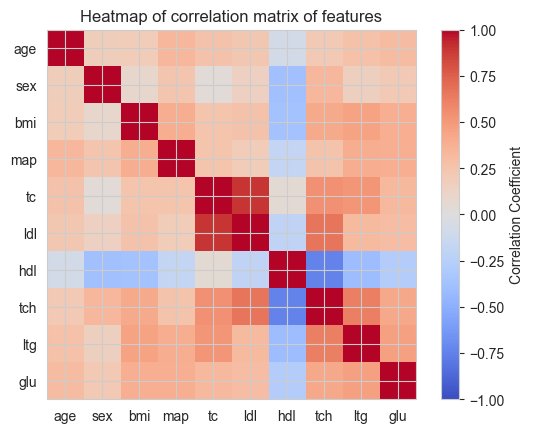

In [29]:
features = ['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']
corr_matrix = df[features].corr()
print(corr_matrix)

plt.imshow(corr_matrix, cmap='coolwarm', vmin = -1, vmax = 1)
plt.colorbar(label = 'Correlation Coefficient')
plt.xticks(range(10), labels = features)
plt.yticks(range(10), labels = features )
plt.title("Heatmap of correlation matrix of features")
plt.show()

Correlation between age and 'prog': 0.1878887507189198
Correlation between sex and 'prog': 0.04306199845160539
Correlation between bmi and 'prog': 0.5864501344746885
Correlation between map and 'prog': 0.44148384893088605
Correlation between tc and 'prog': 0.2120224810145507
Correlation between ldl and 'prog': 0.17405358696874254
Correlation between hdl and 'prog': -0.39478925067091836
Correlation between tch and 'prog': 0.430452884744773
Correlation between ltg and 'prog': 0.565883425242809
Correlation between glu and 'prog': 0.382483484248581


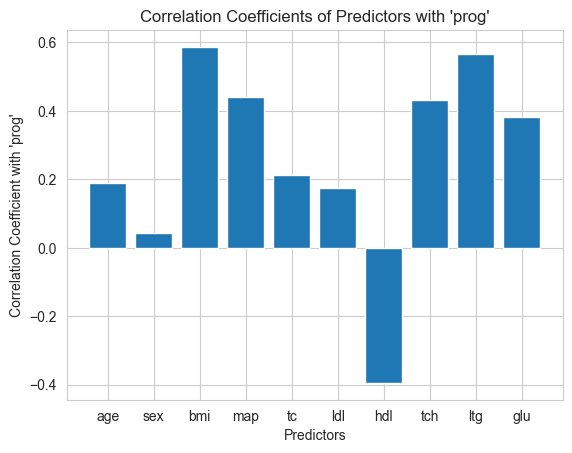


bmi, map and ltg have the strongest correlation with prog (strongest predictors of disease progression): strongest linear relationship between them. All positively correlated too. i.e. there is the greatest linear relationship between having high ltg etc. with high prog.


In [30]:
corr_coefs = []

for feature in features:
      r = stats.correlation(df[feature], df['prog'])
      print(f"Correlation between {feature} and 'prog': {r}")
      corr_coefs.append(r)

plt.bar(features, corr_coefs)
plt.title("Correlation Coefficients of Predictors with 'prog'")
plt.xlabel("Predictors")
plt.ylabel("Correlation Coefficient with 'prog'")
plt.show()

print()
print("bmi, map and ltg have the strongest correlation with prog (strongest predictors of disease progression): strongest linear relationship between them. All positively correlated too. i.e. there is the greatest linear relationship between having high ltg etc. with high prog.")


In [31]:
df2 = df[['age', 'prog', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu', 'sex']]
df2['sex'] = df2['sex'].astype(int)

df2.info(show_counts = False)
df2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 1 to 442
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   age     int64  
 1   prog    int64  
 2   bmi     float64
 3   map     float64
 4   tc      int64  
 5   ldl     float64
 6   hdl     float64
 7   tch     float64
 8   ltg     float64
 9   glu     int64  
 10  sex     int64  
dtypes: float64(6), int64(5)
memory usage: 41.4 KB


,age,prog,bmi,map,tc,ldl,hdl,tch,ltg,glu,sex
1,59,151,32.1,101.0,157,93.2,38.0,4.0,2.110590,87,1
2,48,75,21.6,87.0,183,103.2,70.0,3.0,1.690196,69,0
3,72,141,30.5,93.0,156,93.6,41.0,4.0,2.029384,85,1
4,24,206,25.3,84.0,198,131.4,40.0,5.0,2.123852,89,0
5,50,135,23.0,101.0,192,125.4,52.0,4.0,1.863323,80,0


[[ 0.01852082 -0.00795769 -0.04507155  0.04606014 -0.03308694  0.0256012
  -0.02869419  0.47086647  1.01605203  0.01955008]]
[-4.04391631]


<BarContainer object of 10 artists>

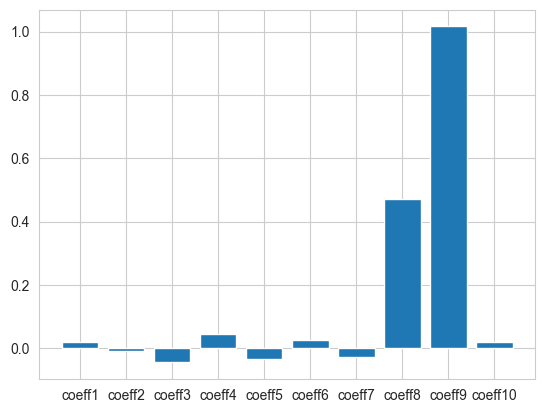

In [32]:
new_features = ['age', 'prog', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']

sex_binary = df2["sex"].map({0: "female", 1: "male"})
labels = ["female", "male"]

lda_all = LDA().fit(df2[new_features], sex_binary)
print(lda_all.coef_)
print(lda_all.intercept_)



plt.bar(['coeff1','coeff2', 'coeff3', 'coeff4', 'coeff5', 'coeff6', 'coeff7','coeff8', 'coeff9', 'coeff10'], lda_all.coef_[0]) #coeff_age

Training-set (descriptive) accuracy: 0.713


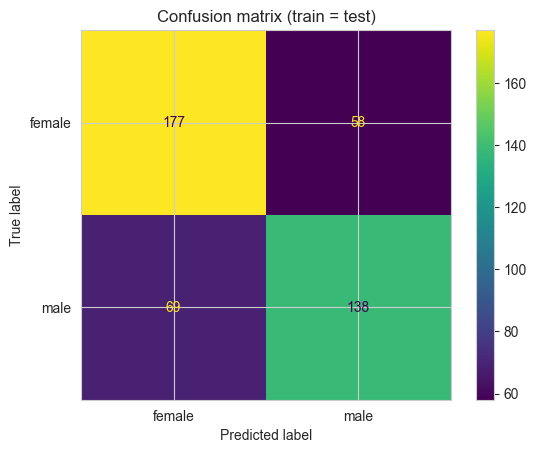

In [33]:
pred_all = lda_all.predict(df2[new_features])
print(f"Training-set (descriptive) accuracy: {accuracy_score(sex_binary, pred_all):.3f}")

ConfusionMatrixDisplay.from_predictions(sex_binary, pred_all, labels = labels)
plt.title("Confusion matrix (train = test)")
plt.show()

Test-set accuracy: 0.640


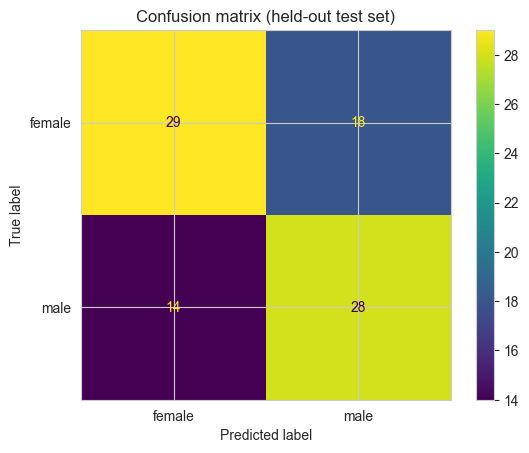

80/20 train/test split was used
will generalise if the(re is enough) test data to resemble distribution of real data; i.e. through sufficient train-test split, sufficient total data


In [34]:
X_tr, X_te, y_tr, y_te = train_test_split(df2[new_features], sex_binary, test_size=0.2, random_state=0, stratify=sex_binary) # stratify preserves the class proportions of y in testing and training.
lda_split = LDA().fit(X_tr, y_tr)
pred_te = lda_split.predict(X_te)
print(f"Test-set accuracy: {accuracy_score(y_te, pred_te):.3f}")
ConfusionMatrixDisplay.from_predictions(y_te, pred_te, labels=labels)
plt.title("Confusion matrix (held-out test set)")
plt.show()

print("80/20 train/test split was used")
print("will generalise if the(re is enough) test data to resemble distribution of real data; i.e. through sufficient train-test split, sufficient total data")

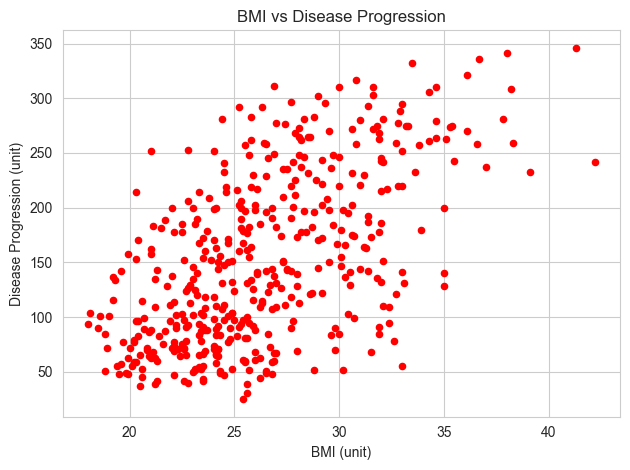

r and p: 0.5864501344746886 3.466006445167354e-42


In [35]:
plt.figure()
plt.scatter(df2['bmi'], df2['prog'], color='red', s=20)
plt.title("BMI vs Disease Progression")
plt.xlabel("BMI (unit)")
plt.ylabel("Disease Progression (unit)")
plt.grid(True)
plt.tight_layout()
plt.show()

r_value, p_value_2 = pearsonr(df2['bmi'], df2['prog'])
print("r and p:", r_value, p_value_2)

#it is significant
#assumes bmi and disease progression normal (with equal variances)

#moderate to strong positive linear relationship (especially given how many different factors contribute to prog): as bmi increases, disease progression tends to increase.